In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ParisHousingClass99.88.csv")

In [3]:
df['category_label'] = df['category'].map({'Basic': 0, 'Luxury': 1})

In [4]:
X = df.drop(['category','category_label'], axis=1)
y = df.category_label

In [5]:
#Нормалізація даних
X_std = StandardScaler().fit_transform(X)

# Зниження розмірності
## 1)РСА

In [6]:
pca = PCA(n_components=2) #знижуємо розмірність до двох
X_pca = pca.fit_transform(X_std)

In [7]:
#порахуємо параметри

exp_var_pca = pca.explained_variance_ratio_ #Відсоток дисперсії, пояснений кожним із вибраних компонентів.
cum_sum_eigenvalues = np.cumsum(exp_var_pca) #кумулятвна сума

# This will be used to create step plot
# for visualizing the variance explained by each principal component.

In [8]:
print(exp_var_pca)

[0.1177292  0.06291553]


In [9]:
print(cum_sum_eigenvalues)


[0.1177292  0.18064473]


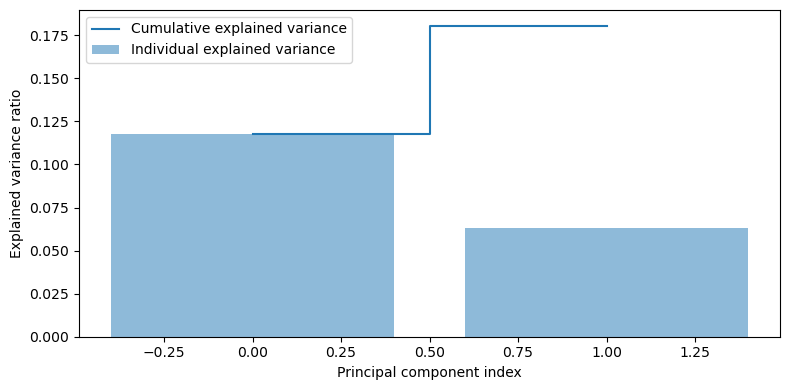

In [10]:
#Візуалізація дисперсії, поясненої різними головними компонентами.
plt.figure(figsize=(8,4))

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
principal_breast_Df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

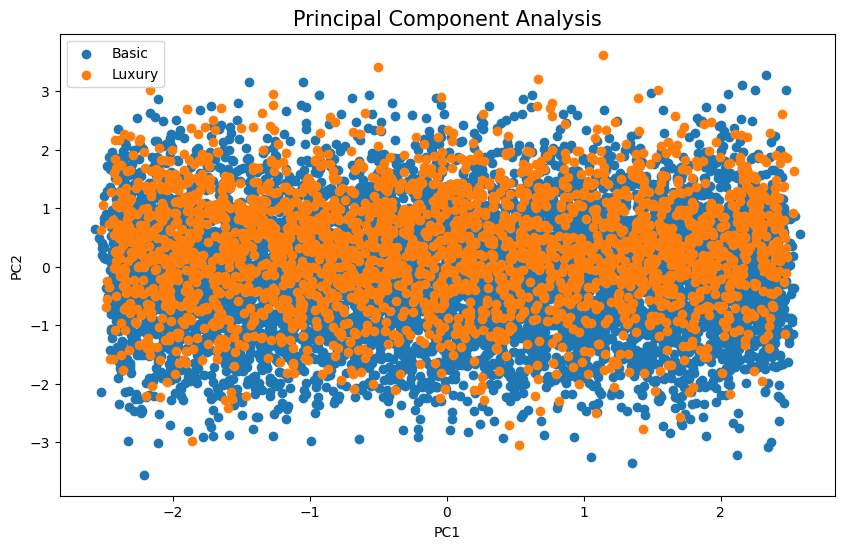

In [12]:
plt.figure(figsize=(10,6))

category = sorted(df.category.unique())

for c in category:
    indicesToKeep = df.category == c
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'PC1'], principal_breast_Df.loc[indicesToKeep, 'PC2'])
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis",fontsize=15)
plt.legend(category)

## 2) TSNE

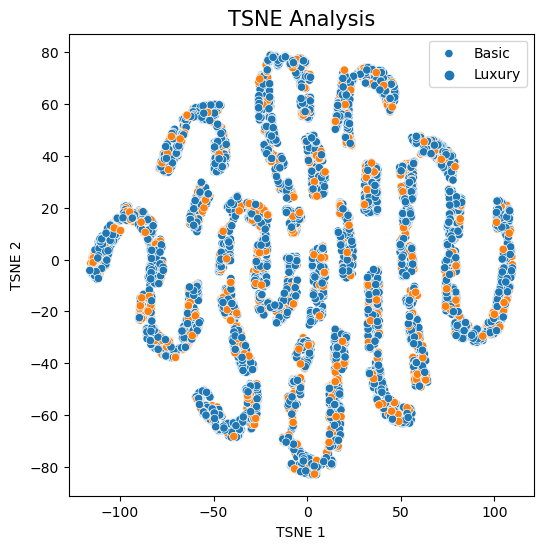

In [21]:
tsne = TSNE(n_components=2).fit_transform(X)

tsne_df = pd.DataFrame({'TSNE 1': tsne[:,0], 'TSNE 2': tsne[:,1], 'label': y})

plt.figure(figsize=(6,6))
sns.scatterplot(data = tsne_df, x =  'TSNE 1', y = 'TSNE 2', hue = 'label')

plt.title("TSNE Analysis",fontsize=15)
plt.legend(category)

# Кластерний аналіз

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [23]:
img = plt.imread("photo.jpg")

In [24]:
img = np.array(img, dtype=np.float64) / 255

E:\papochka\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\papochka\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
E:\papochka\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\papochka\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

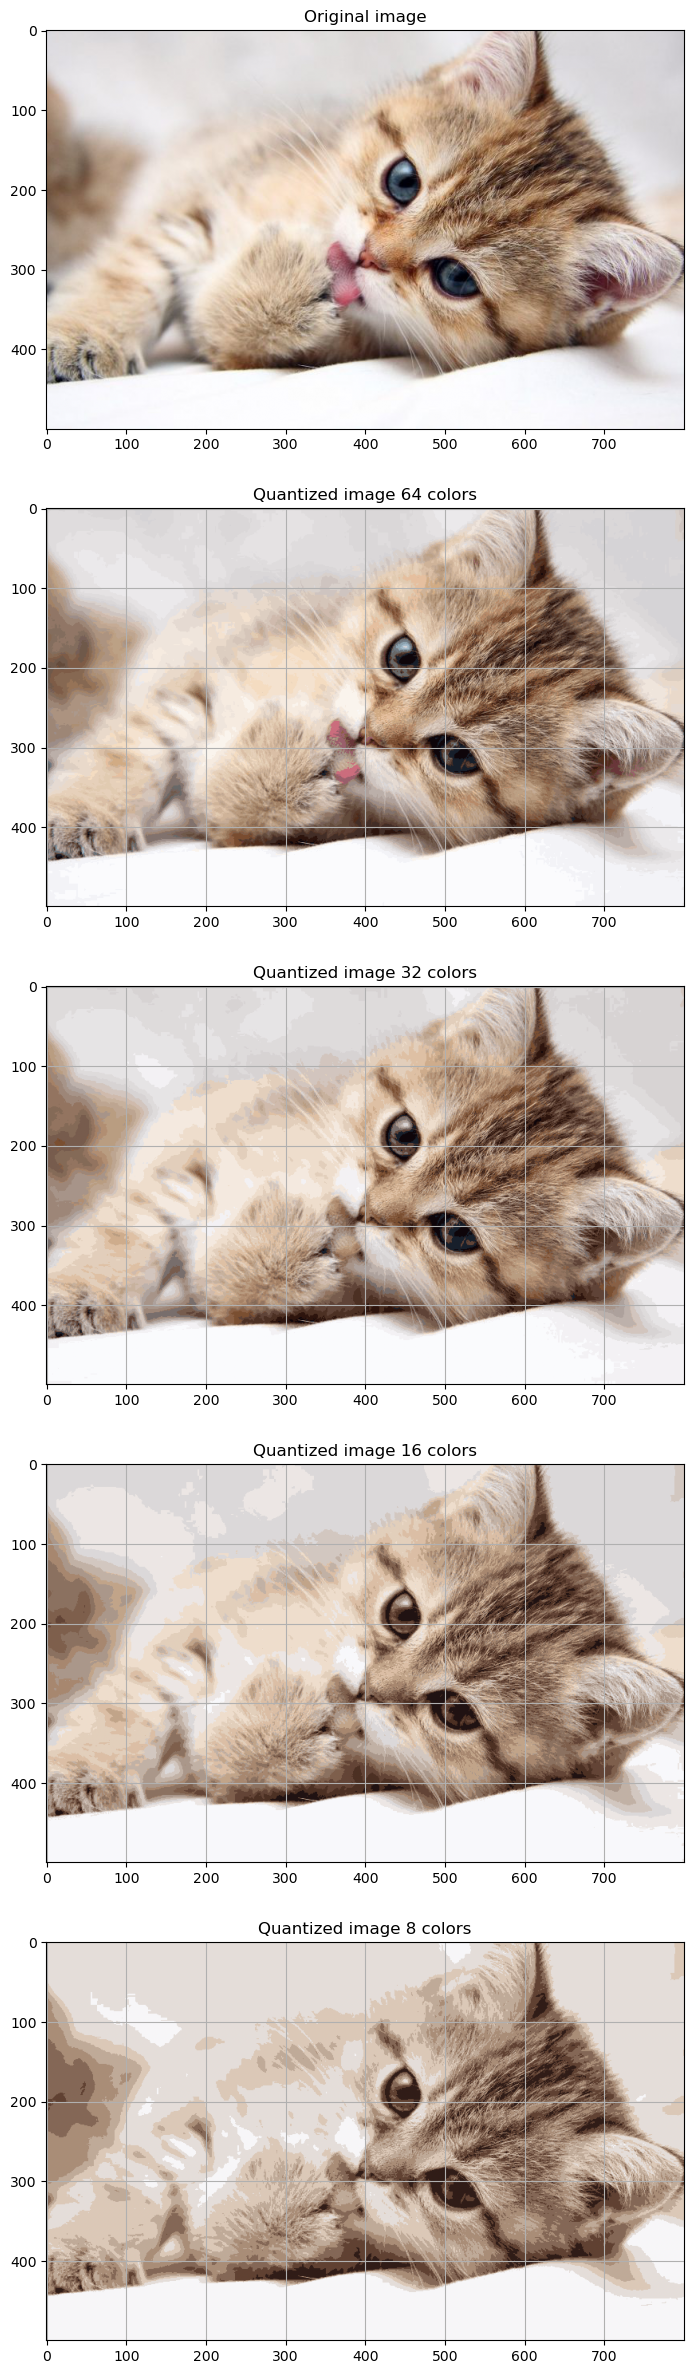

In [25]:
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

fig, axs = plt.subplots(5, 1, figsize=(45,30))

axs[0].imshow(img)
axs[0].set_title("Original image")

for ax, n_colors in zip(axs[1:], [64, 32, 16, 8]):

    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array)

    
    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        return codebook[labels].reshape(w, h, -1)

    
    ax.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    ax.set_title(f"Quantized image {n_colors} colors")
    ax.grid(True)

plt.show()

## Обробка та класифікація текстових даних
#### Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

In [26]:
data = pd.read_csv(r"mail_data.csv")

In [27]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Попередня обробка

In [28]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
nltk.download('all')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | D

[nltk_data]    |   Package lin_thesaurus is already up-to-date!
[nltk_data]    | Downloading package mac_morpho to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package mac_morpho is already up-to-date!
[nltk_data]    | Downloading package machado to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package machado is already up-to-date!
[nltk_data]    | Downloading package masc_tagged to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package masc_tagged is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\А

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package spanish_grammars to
[nltk_data]    |     C:\Users\Админист

In [29]:
def Preprocess(text):
    
    clear_text = []
    for i in range(len(text)):

        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if (word not in stopwords.words('english') and len(word)>2)]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        clear_text.append(r)
    return clear_text
    

data['clear message']=Preprocess(list(data['Message'].values))
data.head(10)

,Category,Message,clear message
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month entitled update latest colour mob...


## Візуалізація найбільш поширених слів

In [30]:
words = " ".join(list(data['clear message'])).split()

words_freq = FreqDist(words)

In [31]:
#top 5
words_freq.most_common()[:5]

[('call', 638), ('get', 408), ('day', 293), ('free', 288), ('know', 272)]

## Векторизація

In [32]:
# Додамо поле "Спам" з бінарними мітками (1: спам, 0: не спам)
data['Spam_label'] = data['Category'].map({'spam': 0, 'ham': 1})

# Запишемо вхідні дані (X) і мітку класу (Y) в окремі змінні
X = data["clear message"]
y = data["Spam_label"]

In [33]:
from sklearn.model_selection import train_test_split

# Ділимо дані на навчання і тест (70% на 30% відповідно)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()#створимо векторизатор
X_train_features = vectorizer.fit_transform(X_train)#векторизуємо дані навчання
X_test_features = vectorizer.transform(X_test)#векторизуємо дані тесту

## Класифікація

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

classifier = RandomForestClassifier().fit(X_train_features,y_train)

y_pred = classifier.predict(X_test_features)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       282
           1       0.98      1.00      0.99      1947

    accuracy                           0.98      2229
   macro avg       0.99      0.93      0.95      2229
weighted avg       0.98      0.98      0.98      2229



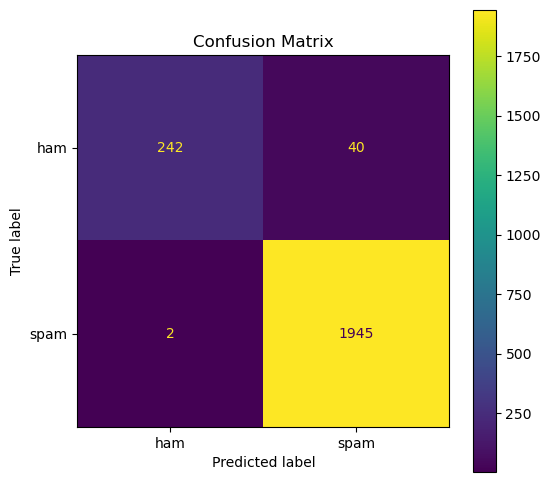

In [37]:
plt.rcParams["figure.figsize"] = (6,6)

cmd_obj= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=data.Category.unique())
cmd_obj.plot()

cmd_obj.ax_.set(
                    title= "Confusion Matrix", 
                    xlabel='Predicted label', 
                    ylabel='True label')
plt.show()